In [1]:
import re
import string
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from torchtext.data.metrics import bleu_score

In [ ]:
!pip install git+https://github.com/Maluuba/nlg-eval.git@master
# if you are a macOS High Sierra or higher, then run this to allow multithreading:
!export OBJC_DISABLE_INITIALIZE_FORK_SAFETY=YES
!nlg-eval --setup

In [2]:
from nlgeval import NLGEval
nlgeval = NLGEval(no_overlap=True, no_skipthoughts=True)  # loads the models

In [21]:
from tqdm.notebook import tqdm
def df2metrics(df, max_n=2):
    df.dropna(how='any', inplace=True)
    reference = df['original_sentence']
    hypothesis = df['predicted_sentence']
    weights = [1. / max_n] * max_n
    print(f"Calculating BLEU_{max_n}")
    score_bleu = bleu_score([i.split() for i in hypothesis], [[i.split()] for i in reference], max_n=max_n, weights=weights)
    metric_results = []
    for ref, hyp in tqdm(zip(reference, hypothesis)):
        metric_results.append(nlgeval.compute_individual_metrics([ref], hyp))
    result = {}
    for key in metric_results[0].keys():
        result[key] = sum([i[key] for i in metric_results]) / len(metric_results)
    result[f'BLEU_{max_n}'] = score_bleu
    return result

In [22]:
df_results = []
models = ['GRU', "PRADO"]
for i in range(len(models)):
    values = [models[i]]
    metrics_dict = df2metrics(pd.read_csv(f'saved_models/customQA/{models[i]}/2-2_256/test_results.csv'))
    values.extend(list(metrics_dict.values())[1:])
    df_results.append(values)

Calculating BLEU_2


0it [00:00, ?it/s]

Calculating BLEU_2


0it [00:00, ?it/s]

In [45]:
metrics_dict['BLEU_2'] = metrics_dict['bleu_2']
metrics_dict.pop('bleu_2')

0.1137749175700841

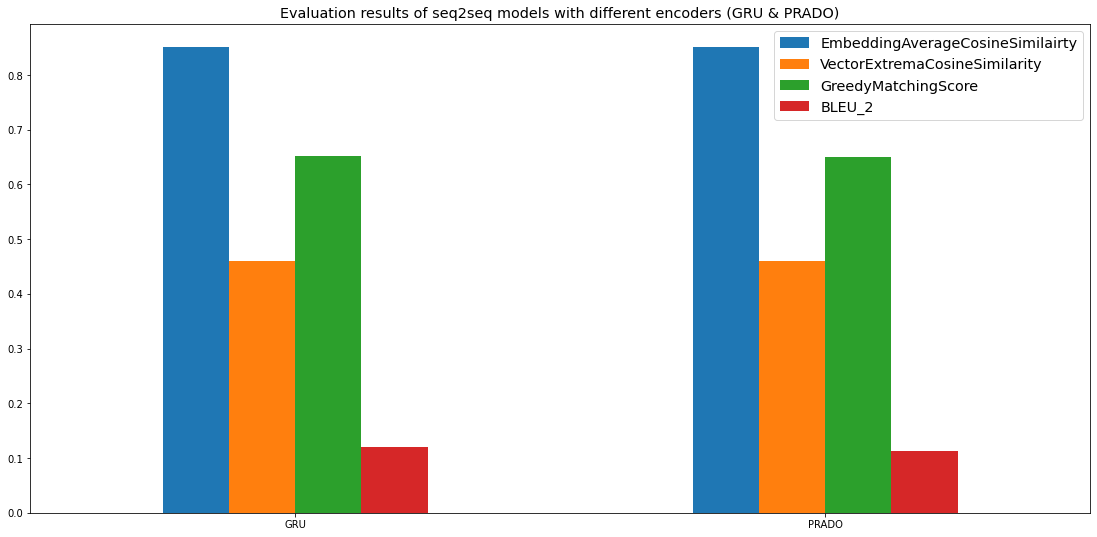

In [46]:
columns = ['model']
columns.extend(list(metrics_dict.keys())[1:])
results = pd.DataFrame(df_results, columns=columns)
ax = results[list(metrics_dict.keys())[1:]].plot(kind='bar', figsize=(19, 9))
ax.set_xticklabels(results["model"].values)
ax.set_title('Evaluation results of seq2seq models with different encoders (GRU & PRADO)', fontsize='x-large')
plt.xticks(rotation=0)
plt.legend(fontsize='x-large')
plt.savefig('model_results.png', dpi=300)
plt.show();

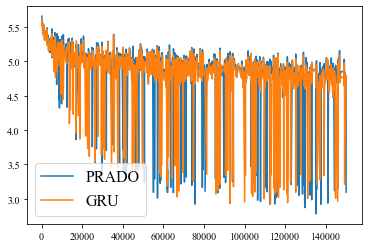

In [7]:
import csv
import matplotlib.pyplot as plt
import pandas as pd
df1 = pd.read_csv('prado_scalar_loss.csv')
step1 = df1['Step'].values.tolist()
loss1 = df1['Value'].values.tolist()
df2 = pd.read_csv('gru_scalar_loss.csv')
step2 = df2['Step'].values.tolist()
loss2 = df2['Value'].values.tolist()
plt.plot(step1, loss1, label='PRADO')
plt.plot(step2, loss2, label='GRU')
plt.legend(loc='lower left', fontsize=16)
plt.savefig('training_loss.png', dpi=300)